In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.ndimage as ndimage
%matplotlib inline

# Part 1: Basics

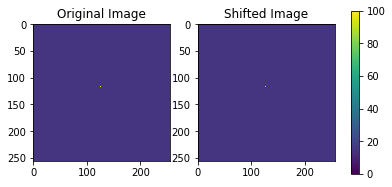

In [2]:
img1 = 15*np.ones((256,256))
img1[116,126] = 100
img2 = ndimage.shift(img1, [0.24, 0.0003])
# img2 = np.fft.fftshift(img1)


fig, ax = plt.subplots(1,2)
plot1 = ax[0].imshow(img1, cmap='viridis', vmin=0, vmax=100)
plot2 = ax[1].imshow(img2, cmap='viridis', vmin=0, vmax=100)
cbar = plt.colorbar(plot2, location='right', ax=ax, fraction=0.05, shrink=0.75)
ax[0].set_title('Original Image')
ax[1].set_title('Shifted Image')
plt.show()

[[  0.99220343+0.00000000e+00j  45.94579553+2.20805271e+00j
  -43.7833127 -4.41075659e+00j ...  45.51294295-6.60289344e+00j
  -43.7833127 +4.41075659e+00j  45.94579553-2.20805271e+00j]
 [ 44.06229776+1.30687009e+01j   1.16613744+6.53489657e-02j
    0.836945  -6.16271923e-02j ...   1.17454334+3.17619764e-02j
    0.82690298-2.85519777e-02j   1.17116468+4.87619444e-02j]
 [-36.41620196-2.49888798e+01j   0.858188  -9.33353445e-02j
    1.13634403+1.23747181e-01j ...   0.84040333-6.36922870e-02j
    1.15556393+9.49536339e-02j   0.84856681-7.89506767e-02j]
 ...
 [ 29.54754161-3.48031409e+01j   1.11835436-1.48419255e-01j
    0.87506053+1.07127737e-01j ...   1.09056745-1.69056495e-01j
    0.90180176+1.29044671e-01j   1.1049671 -1.59420404e-01j]
 [-36.41620196+2.49888798e+01j   0.84856681+7.89506767e-02j
    1.15556393-9.49536339e-02j ...   0.86917426+1.06707616e-01j
    1.13634403-1.23747181e-01j   0.858188  +9.33353445e-02j]
 [ 44.06229776-1.30687009e+01j   1.17116468-4.87619444e-02j
    0.8269

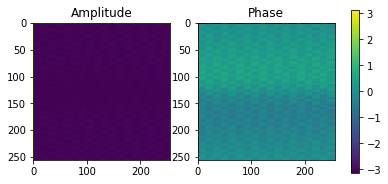

In [3]:
from matplotlib.colors import LogNorm

# do fft shift before fft to get smoother phase plot (10/18)

fft1 = np.fft.ifft2(np.fft.fftshift(img1))
fft2 = np.fft.ifft2(np.fft.fftshift(img2))
fftcombo = fft2 / fft1
print(fftcombo)
fig, ax = plt.subplots(1,2)
fft1 = ax[0].imshow(np.abs(fftcombo), cmap='viridis')
fft2 = ax[1].imshow(np.angle(fftcombo), cmap='viridis')
cbar = plt.colorbar(fft2, location='right', ax=ax, fraction=0.05, shrink=0.75)
ax[0].set_title('Amplitude')
ax[1].set_title('Phase')
plt.show()

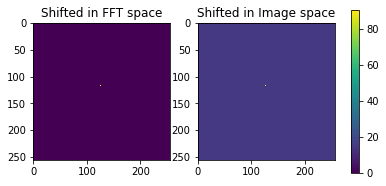

In [4]:
H=np.fft.fft2(img1)
[xF, yF] = np.meshgrid(255,255)
dx = 0.24
dy = 0.0003
H = H *np.exp(2*np.pi*(xF*dx + yF*dy)/256)
InvFFT = np.fft.ifft2(np.fft.ifftshift(H))
fig, ax = plt.subplots(1,2)
ax00 = ax[0].imshow(np.abs(InvFFT), cmap='viridis')
ax01 = ax[1].imshow(img2, cmap='viridis')
cbar = plt.colorbar(ax01, location='right', ax=ax, fraction=0.05, shrink=0.75)
ax[0].set_title('Shifted in FFT space')
ax[1].set_title('Shifted in Image space')
plt.show()

# Part 2

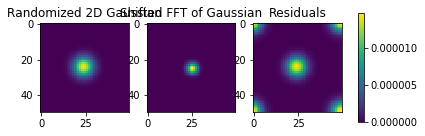

In [52]:
# Create Gaussian function to plot
def gaus2d(x, y, mx=125, my=125, sx=20, sy=20):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

x = np.linspace(0,255)
y = np.linspace(0,255)
x, y = np.meshgrid(x, y)
z = gaus2d(x, y)

# apply fft shift before plotting fft as in problem 1
# Plot gaussian distribution

fig, ax = plt.subplots(1,3)

ax[0].imshow(z, cmap='viridis')
ax[0].set_title('Randomized 2D Gaussian')

# Plot 2D fft of gaussian distribution
z2 = np.copy(z)
z2fft = np.fft.ifftshift(np.fft.ifft2(z2))
z2fftplt = ax[1].imshow(np.abs(z2fft), cmap='viridis')
ax[1].set_title('Shifted FFT of Gaussian')
cbar = plt.colorbar(z2fftplt, location='right', ax=ax, fraction=0.05, shrink=0.5)


# Create shifted analytic FFT of randomized 2d gaussian directly in fourier space
def gaussFFT(array):
    return np.fft.fftshift(np.fft.fft2(array))
analyticFFT = gaussFFT(z2)
analyticIMG = np.fft.ifftshift(np.fft.ifft2(analyticFFT))

# subtract result from original and plot residual
subtrac = np.fft.ifftshift(np.abs(z - analyticIMG))
ax[2].imshow(subtrac, cmap='viridis')
ax[2].set_title('Residuals')
# fig.tight_layout()
plt.show()

In [8]:
# now i need to create analytic fourier transform of the gaussian data directly in fourier space

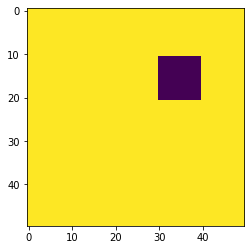

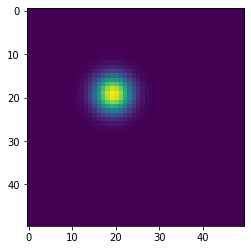

(50, 50) (50, 50)


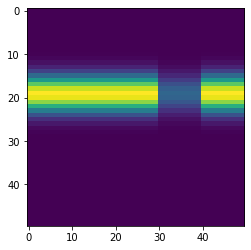

In [72]:
zeroer = 1*np.ones((50,50))
zeroer[11:11+10,30:30+10] = 0
fig, ax = plt.subplots(1,1)
ax.imshow(zeroer, cmap='viridis')
plt.show()

def gaus2d(x, y, mx=125, my=125, sx=20, sy=20):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))
masked = gaus2d(x=x, y=y, mx=100, my=100, sx=15, sy=15)
fig, ax=plt.subplots(1,1)
ax.imshow(masked, cmap='viridis')
plt.show()
print(np.shape(masked), np.shape(zeroer))
fig, ax = plt.subplots(1,1)
ax.imshow(np.matmul(masked, zeroer), cmap='viridis')
plt.show()